In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt


Load data

In [3]:
df=pd.read_csv('../data/togo-dapaong_qc.csv')

Summary Statistics and Missing Report

In [4]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [5]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [6]:
df.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525596,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525597,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,NaN
525598,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN
525599,2022-10-25 00:00,-1.2,0.0,0.0,0.0,0.0,25.4,52.3,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN


Description of columns

In [7]:
print('\n-----------\nThe description of categorical columns')
print(df.describe(include=[object]))
print('\n-----------\nThe description of all columns')
print(df.describe(include='all'))


-----------
The description of categorical columns
               Timestamp
count             525600
unique            525600
top     2021-10-25 00:01
freq                   1

-----------
The description of all columns
               Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2021-10-25 00:01            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     230.555040     151.258469     116.444352   
std                  NaN     322.532347     250.956962     156.520714   
min                  NaN     -12.700000       0.000000       0.000000   
25%                  NaN      -2.200000       0.000000       0.000000   
50%                  NaN       2.100000       0.000000       2.500000   
75%                  NaN     442.400000     246.4

Overview of dataset

In [8]:
print('\n-----------\nAn Overview of dataset')
print(df.info())


-----------
An Overview of dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float6

Identifying columns with more than 5% missing values

In [9]:
missing_values = df.isna().sum()
threshold = len(df) * 0.05
columns_with_missing = missing_values[missing_values > threshold]
print('Missing values count\n',missing_values)
print('\n-----------\nColumns with more than 5% missing values')
print(columns_with_missing)

Missing values count
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

-----------
Columns with more than 5% missing values
Comments    525600
dtype: int64


Outlier Detection & Basic Cleaning

In [10]:
# Compute Z-scores for key columns in a DataFrame (so we retain the same index)
numeric_cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
z_df = pd.DataFrame(
    zscore(df[numeric_cols], nan_policy='omit'),
    index=df.index,
    columns=numeric_cols
)

# 2. Build an “outlier mask” per column and a combined row mask
outlier_mask_per_col = (z_df.abs() > 3)
any_outlier_row = outlier_mask_per_col.any(axis=1)
df[any_outlier_row]
print(f"Number of outlier samples flagged {any_outlier_row.sum()}")
print(df[any_outlier_row].head())

Number of outlier samples flagged 9251
             Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
4985  2021-10-28 11:06  1139.0  805.1  466.1  1172.0  1154.0  29.8  70.8  2.2   
5410  2021-10-28 18:11    -1.2    0.0    0.0     0.0     0.0  29.7  63.5  6.6   
5411  2021-10-28 18:12    -1.0    0.0    0.0     0.0     0.0  29.3  62.4  6.9   
5413  2021-10-28 18:14    -0.8    0.0    0.0     0.0     0.0  28.6  63.7  7.1   
5420  2021-10-28 18:21    -1.3    0.0    0.0     0.0     0.0  27.7  64.5  6.1   

      WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
4985     2.6      0.4  298.6     13.4  977         0            0.0   44.7   
5410     9.7      1.6  122.1     14.3  976         0            0.0   30.0   
5411     8.9      1.2  128.7     10.8  976         0            0.0   29.9   
5413     8.9      1.1  127.9     14.4  976         0            0.0   29.5   
5420     8.9      1.3  123.2     14.4  977         0            0.0   28.4   

     

In [11]:
# Watching value counts for the columns
for col in numeric_cols:
    df_valueCount = pd.DataFrame({
    'count':df[col].value_counts().values
    }, index=df[col].value_counts().keys())
    df_valueCount.sort_index(inplace=True)
    display(df_valueCount.T)

GHI,-12.7,-12.5,-12.1,-11.1,-10.7,-9.8,-9.1,-8.6,-8.5,-8.4,...,1385.0,1390.0,1391.0,1406.0,1408.0,1412.0,1413.0,1417.0,1419.0,1424.0
count,1,1,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


DNI,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,990.2,991.3,991.6,991.9,992.1,994.2,995.0,997.7,999.0,1004.5
count,304763,89,91,178,324,404,501,466,521,586,...,1,1,1,1,1,1,1,1,1,1


DHI,0.0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,...,734.9,747.3,748.0,753.0,754.1,759.0,771.9,782.3,793.8,805.7
count,253015,586,445,21,448,822,724,661,619,542,...,1,1,1,1,1,1,1,1,1,1


ModA,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,1299.4,1305.0,1309.4,1319.0,1325.0,1327.0,1357.0,1363.0,1374.0,1380.0
count,246128,2653,1293,850,698,589,532,502,464,427,...,1,1,1,1,1,1,1,1,1,1


ModB,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,1284.0,1287.0,1290.0,1304.0,1308.0,1311.0,1340.0,1347.0,1358.0,1367.0
count,246105,2705,1299,854,705,588,547,487,489,435,...,1,1,1,1,1,1,1,1,1,1


WS,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,13.6,13.7,13.9,14.0,14.2,14.3,14.4,15.1,15.8,16.1
count,33413,5751,4448,4585,4218,4625,5609,5774,6746,7385,...,2,3,3,1,3,1,1,2,1,1


WSgust,0.0,0.2,0.3,0.4,0.6,0.7,0.9,1.0,1.1,1.2,...,18.1,18.8,19.3,19.6,20.6,20.8,21.6,22.1,22.9,23.1
count,30294,35,10,1997,150,9205,198,307,18850,205,...,8,2,4,3,2,2,1,1,1,1


Removing outlier rows

In [12]:
# Compute the medians on the *inlier* data only
medians = {}
for col in numeric_cols:
    medians[col] = df.loc[~any_outlier_row, col].median()

# Impute each outlier cell with its column’s inlier median
for col in numeric_cols:
    df.loc[any_outlier_row, col] = medians[col]

# Verify that no |Z|>3 remain
z_df2 = pd.DataFrame(
    zscore(df[numeric_cols], nan_policy='omit'),
    index=df.index,
    columns=numeric_cols
)
remaining = (z_df2.abs() > 3).any(axis=1).sum()
print(f"Remaining rows with |Z|>3: {remaining}")

Remaining rows with |Z|>3: 4695


In [13]:
# Watching value counts for the numeric columns after outlier remval
for col in numeric_cols:
    df_valueCount = pd.DataFrame({
    'count':df[col].value_counts().values
    }, index=df[col].value_counts().keys())
    df_valueCount.sort_index(inplace=True)
    display(df_valueCount.T)

GHI,-12.7,-12.5,-12.1,-11.1,-9.8,-8.6,-8.5,-8.4,-8.3,-8.2,...,1189.0,1190.0,1191.0,1192.0,1193.0,1194.0,1195.0,1196.0,1197.0,1198.0
count,1,1,1,1,1,1,1,1,2,1,...,5,4,8,4,6,7,3,3,3,3


DNI,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,903.1,903.2,903.3,903.4,903.5,903.6,903.8,903.9,904.0,904.1
count,311638,89,91,178,322,399,496,462,512,581,...,5,3,2,2,3,2,8,1,6,4


DHI,0.0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,...,585.1,585.2,585.3,585.4,585.5,585.6,585.7,585.8,585.9,586.0
count,251349,585,444,20,445,813,722,661,618,540,...,11,11,9,7,5,12,5,4,5,6


ModA,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,1153.0,1154.0,1154.1,1155.0,1155.6,1157.0,1158.0,1158.6,1159.0,1171.2
count,244530,2631,1276,844,693,584,527,496,457,423,...,2,2,1,2,1,1,1,1,3,1


ModB,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,1134.0,1135.0,1136.0,1137.0,1138.0,1139.0,1140.0,1141.0,1142.0,1143.0
count,244508,2683,1281,848,700,582,543,481,482,430,...,4,4,2,4,1,1,2,3,2,1


WS,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7
count,33385,5739,4439,4576,4198,4610,5591,5754,6723,7363,...,1125,1015,934,754,611,512,421,388,284,272


WSgust,0.0,0.2,0.3,0.4,0.6,0.7,0.9,1.0,1.1,1.2,...,7.9,8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8
count,30275,35,9,1995,149,9194,198,306,18837,204,...,1715,59,41,1248,29,861,26,23,570,19


In [14]:
# Parse timestamps
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M')

In [15]:
# Drop empty column comments
df.drop(columns=['Comments'], inplace=True)

Exporting cleaned data

In [16]:
df.to_csv('../data/benin_cleaned_csv.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

Time-Series Visualizations

In [17]:
df['Timestamp']

0        2021-10-25 00:01:00
1        2021-10-25 00:02:00
2        2021-10-25 00:03:00
3        2021-10-25 00:04:00
4        2021-10-25 00:05:00
                 ...        
525595   2022-10-24 23:56:00
525596   2022-10-24 23:57:00
525597   2022-10-24 23:58:00
525598   2022-10-24 23:59:00
525599   2022-10-25 00:00:00
Name: Timestamp, Length: 525600, dtype: datetime64[ns]

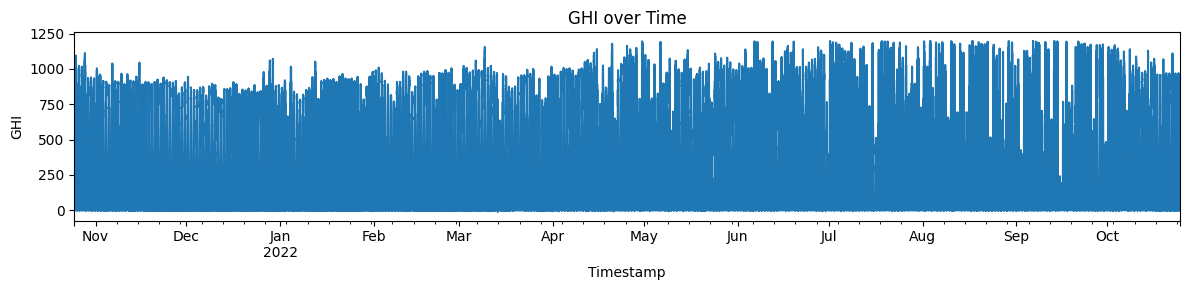

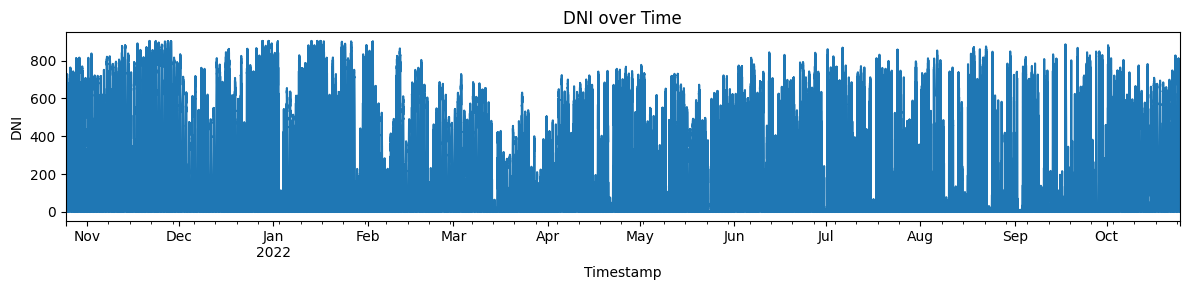

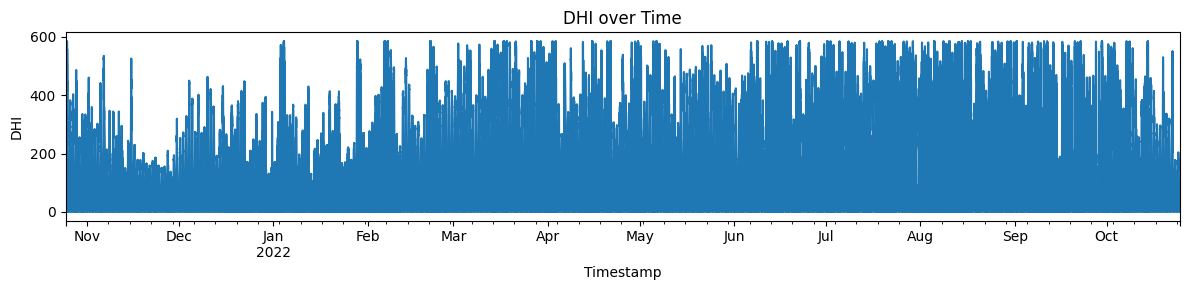

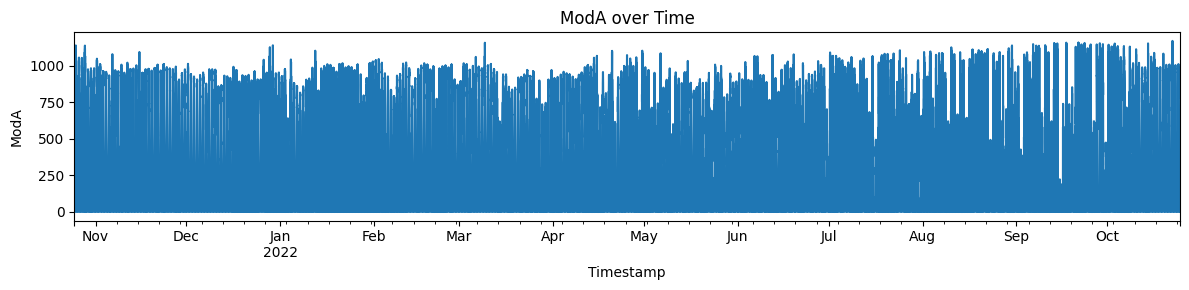

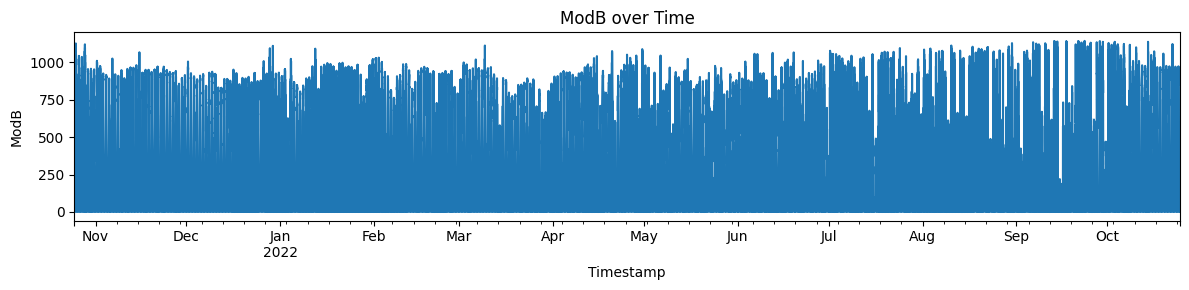

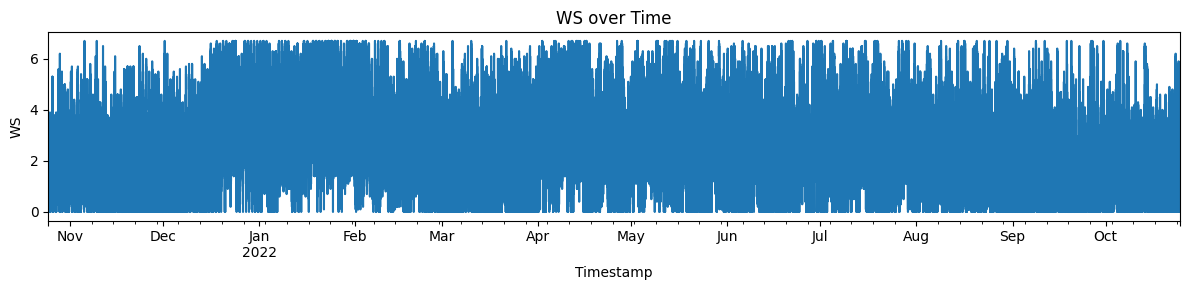

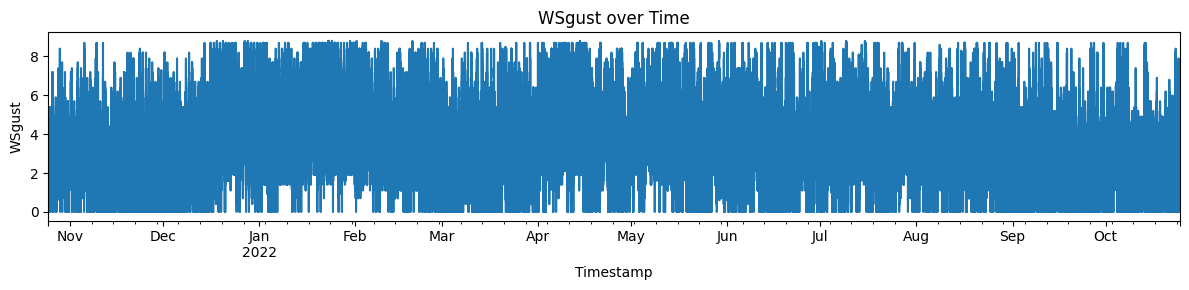

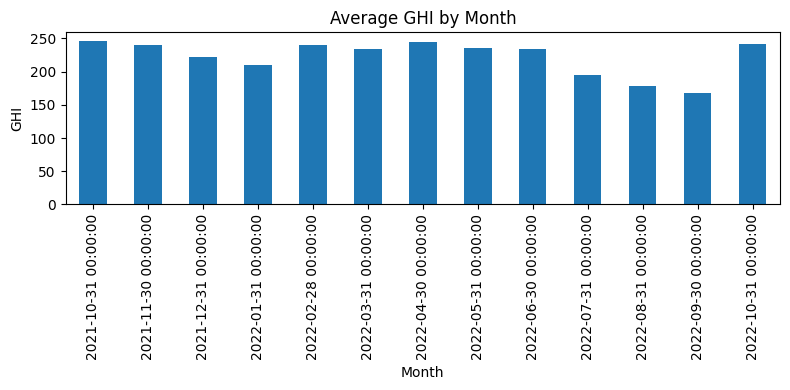

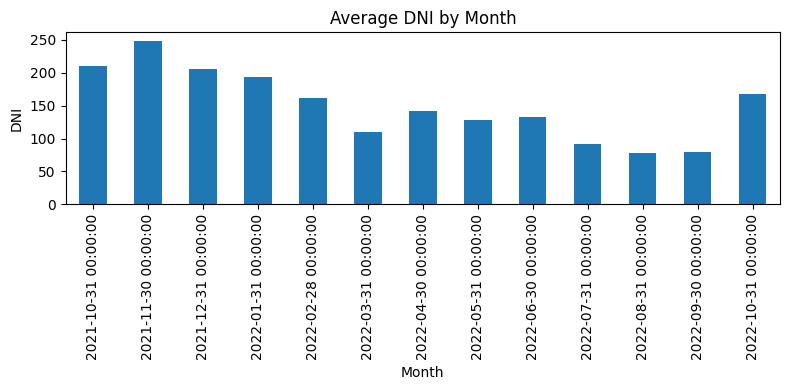

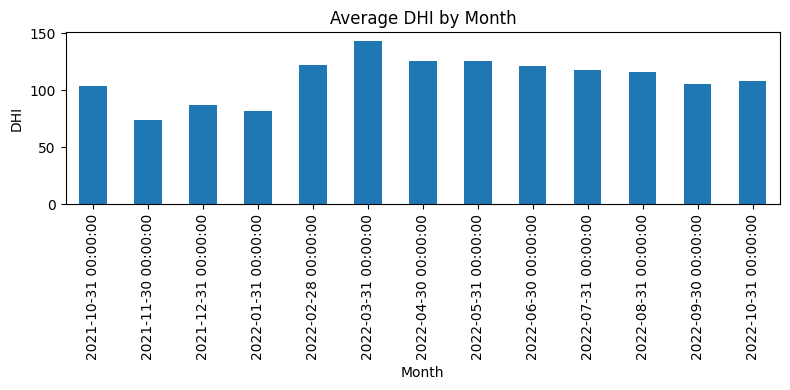

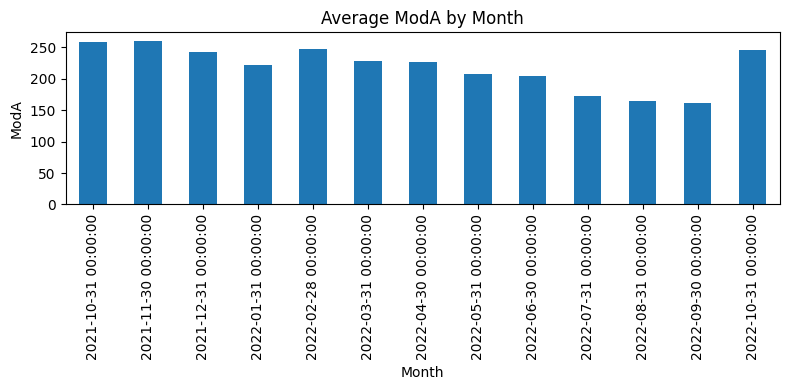

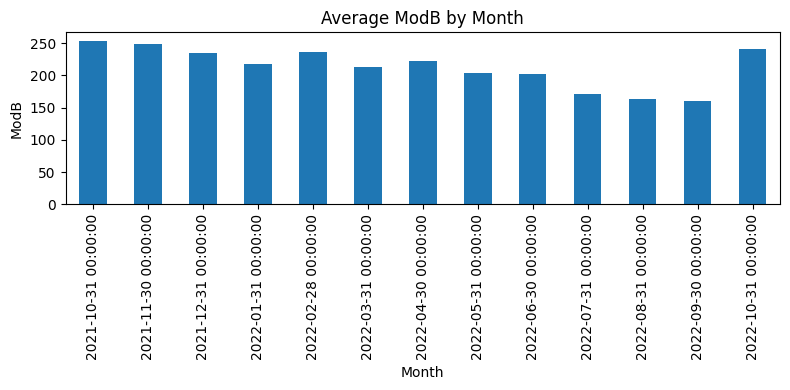

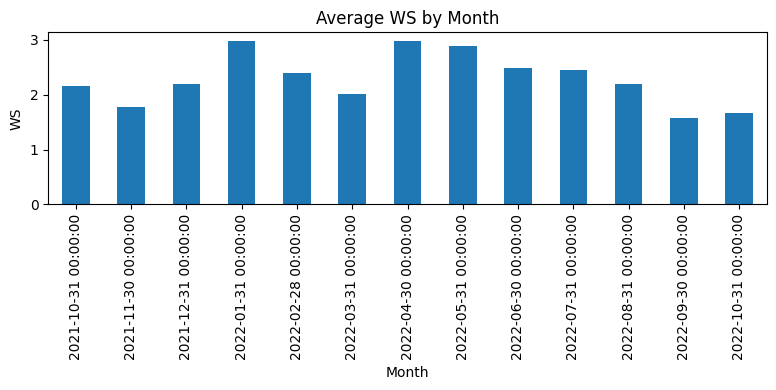

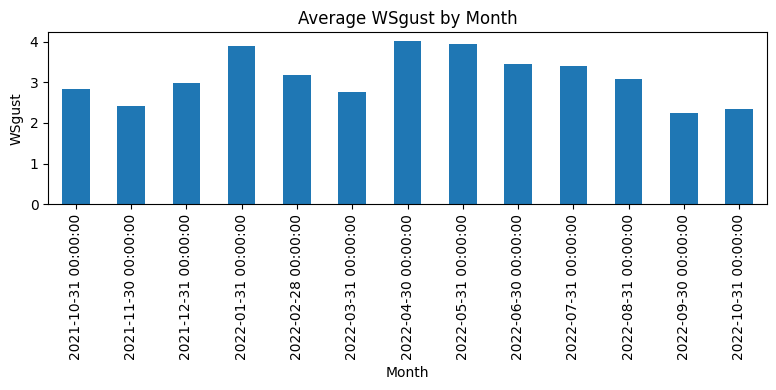

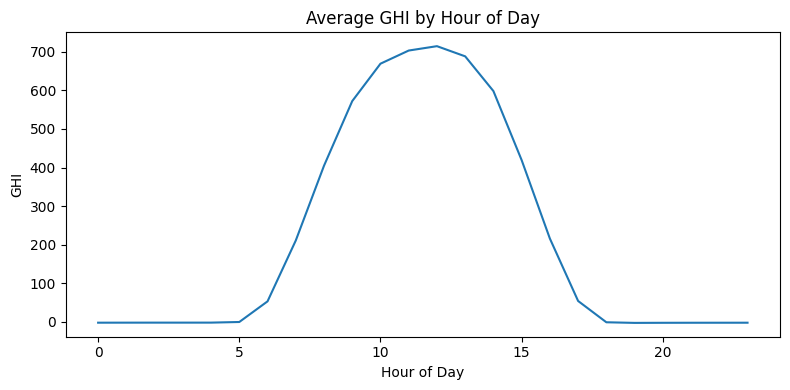

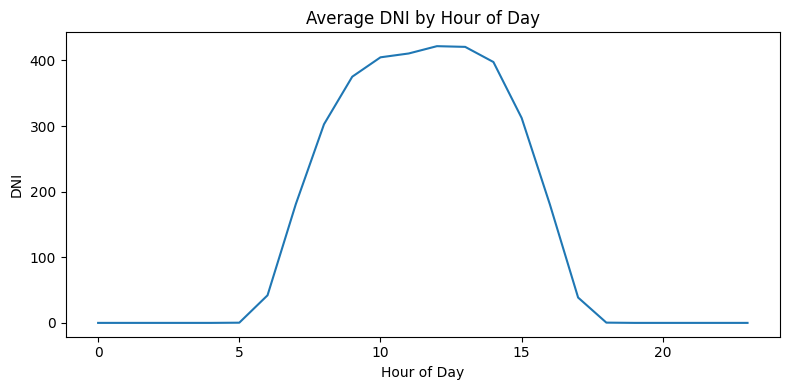

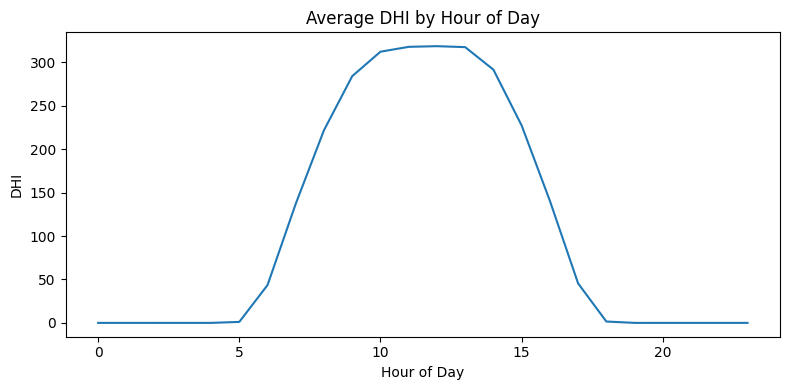

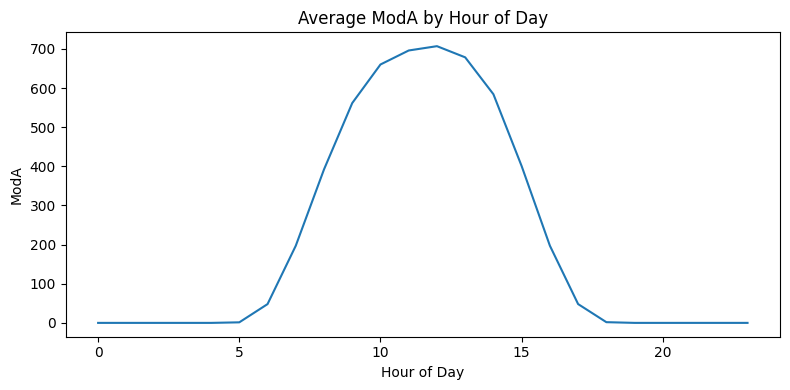

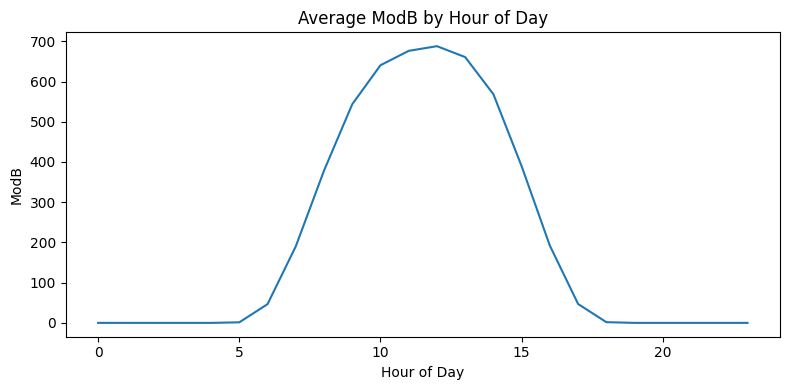

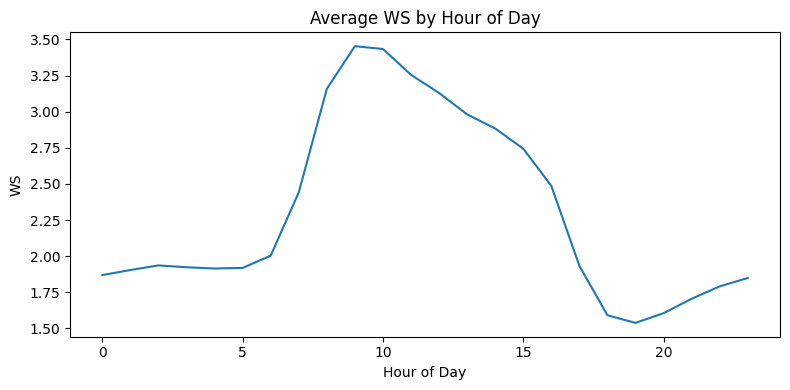

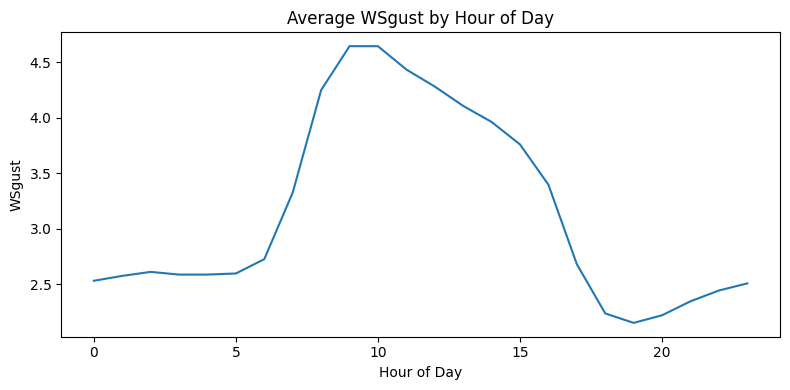

Top 5 Highest GHI readings:
Timestamp
2022-08-03 13:58:00    1198.0
2022-09-06 12:00:00    1198.0
2022-09-13 12:18:00    1198.0
2022-07-18 13:19:00    1197.0
2022-08-17 10:55:00    1197.0
Name: GHI, dtype: float64


In [18]:
df.set_index('Timestamp', inplace=True)
# ─── 1. Full Time-Series Line Charts ────────────────────────────────────────
for col in numeric_cols:
    plt.figure(figsize=(12,3))
    df[col].plot()
    plt.title(f"{col} over Time")
    plt.xlabel("Timestamp")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# ─── 2. Monthly Average Bar Charts ─────────────────────────────────────────
monthly = df[numeric_cols].resample('M').mean()
for col in monthly.columns:
    plt.figure(figsize=(8,4))
    monthly[col].plot(kind='bar')
    plt.title(f"Average {col} by Month")
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# ─── 3. Diurnal (Hourly) Patterns ───────────────────────────────────────────
hourly = df[numeric_cols].groupby(df.index.hour).mean()
for col in hourly.columns:
    plt.figure(figsize=(8,4))
    hourly[col].plot()
    plt.title(f"Average {col} by Hour of Day")
    plt.xlabel("Hour of Day")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# ─── 4. Inspect Top GHI Peaks ───────────────────────────────────────────────
top_peaks = df['GHI'].nlargest(5)
print("Top 5 Highest GHI readings:")
print(top_peaks)

Cleaning Impact

Raw data averages:
                ModA        ModB
Cleaning                        
0         236.524253  228.816071
1         307.229278  301.972165

Cleaned data averages:
                ModA        ModB
Cleaning                        
0         215.409174  209.165875
1         513.887900  512.337011


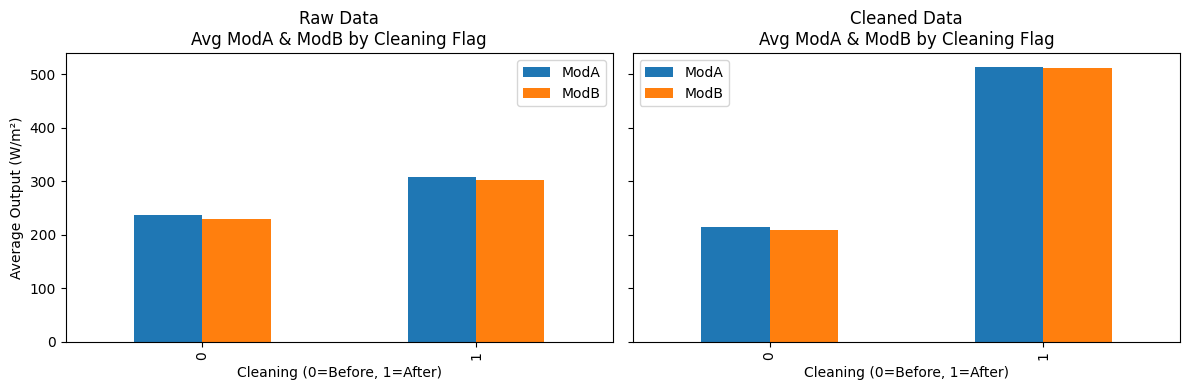

In [19]:
# ─── Load raw datasets ───────────────────────────────────────────
raw_path   = "../data/benin-malanville.csv"    

df_raw   = pd.read_csv(raw_path,   parse_dates=["Timestamp"])

# ─── Group by the sensor cleaning flag ───────────────────────────────────────
grp_raw   = df_raw.groupby("Cleaning")[["ModA", "ModB"]].mean()
grp_clean = df.groupby("Cleaning")[["ModA", "ModB"]].mean()

print("Raw data averages:")
print(grp_raw)
print("\nCleaned data averages:")
print(grp_clean)

# ─── Plot side-by-side for comparison ────────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

grp_raw.plot(kind="bar", ax=axes[0])
axes[0].set_title("Raw Data\nAvg ModA & ModB by Cleaning Flag")
axes[0].set_xlabel("Cleaning (0=Before, 1=After)")
axes[0].set_ylabel("Average Output (W/m²)")

grp_clean.plot(kind="bar", ax=axes[1])
axes[1].set_title("Cleaned Data\nAvg ModA & ModB by Cleaning Flag")
axes[1].set_xlabel("Cleaning (0=Before, 1=After)")

plt.tight_layout()
plt.show()


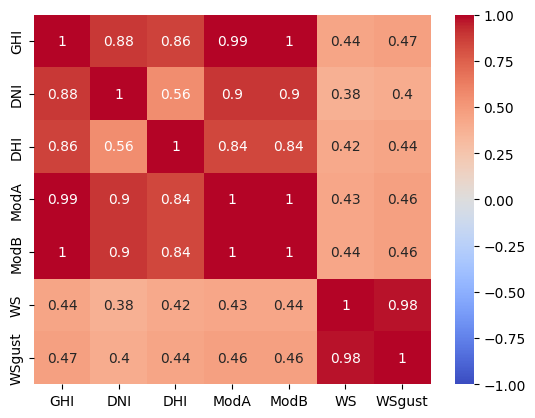

In [20]:
def draw():
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
    plt.show()
    return corr
corr = draw()

Wind & Distribution Analysis


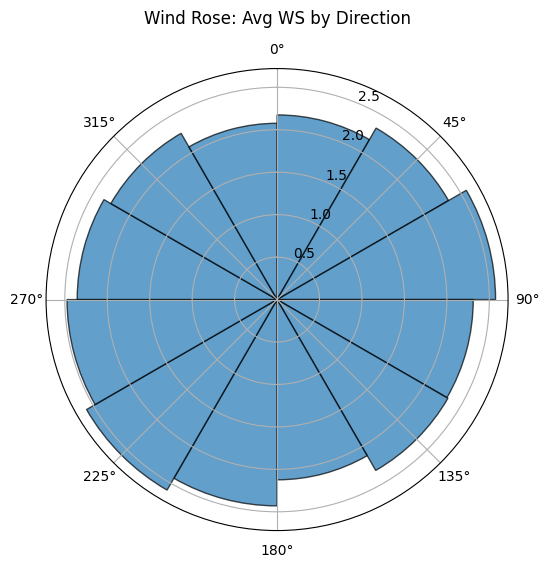

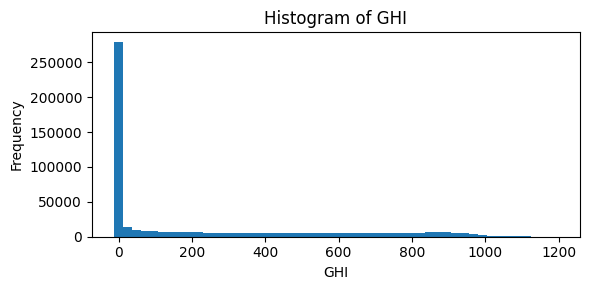

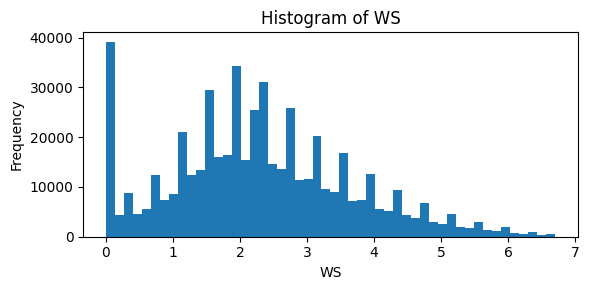

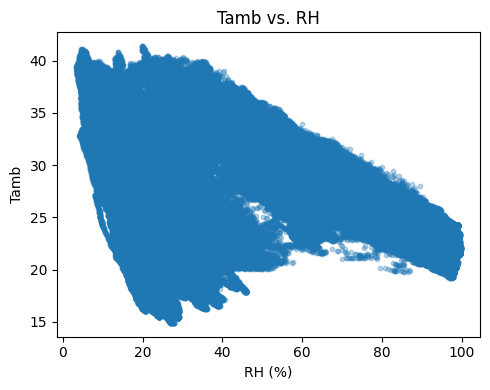

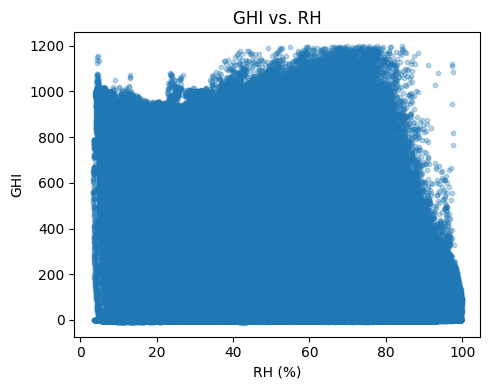

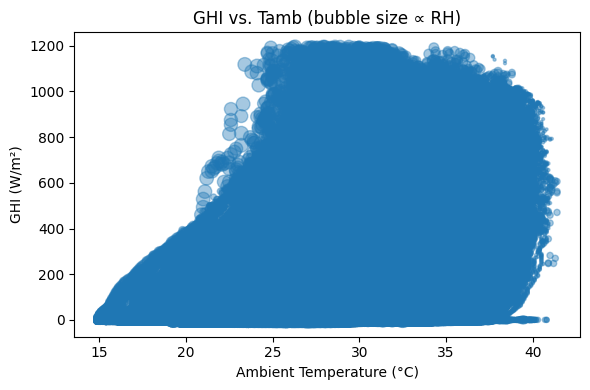

In [21]:
# 1. Wind Rose (radial bar of avg WS by WD)
dir_bins = np.linspace(0, 360, 13)  # 12 sectors of 30°
speed_by_dir = df.groupby(pd.cut(df['WD'], dir_bins))['WS'].mean()
# Compute mid-angles for each bin
angles = np.deg2rad((dir_bins[:-1] + dir_bins[1:]) / 2)

plt.figure(figsize=(6,6))
ax = plt.subplot(projection='polar')
ax.bar(angles, speed_by_dir, width=np.deg2rad(30), edgecolor='k', alpha=0.7)
ax.set_theta_zero_location('N')       # 0° at top (North)
ax.set_theta_direction(-1)            # Degrees increase clockwise
ax.set_title("Wind Rose: Avg WS by Direction", y=1.08)
plt.show()

# 2. Histograms for GHI and WS
for col in ['GHI', 'WS']:
    plt.figure(figsize=(6,3))
    plt.hist(df[col].dropna(), bins=50)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# 3. Temperature Analysis: RH’s influence
for x, y in [('RH', 'Tamb'), ('RH', 'GHI')]:
    plt.figure(figsize=(5,4))
    plt.scatter(df[x], df[y], s=10, alpha=0.3)
    plt.xlabel(f"{x} (%)")
    plt.ylabel(f"{y}")
    plt.title(f"{y} vs. {x}")
    plt.tight_layout()
    plt.show()

# 4. Bubble Chart: GHI vs. Tamb, bubble size ∝ RH
plt.figure(figsize=(6,4))
# normalize RH for marker size scaling (optional)
sizes = (df['RH'] / df['RH'].max()) * 100  
plt.scatter(df['Tamb'], df['GHI'], s=sizes, alpha=0.4)
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.title("GHI vs. Tamb (bubble size ∝ RH)")
plt.tight_layout()
plt.show()
